<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/NLP__LSTM%EC%9C%BC%EB%A1%9C_IMDb_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

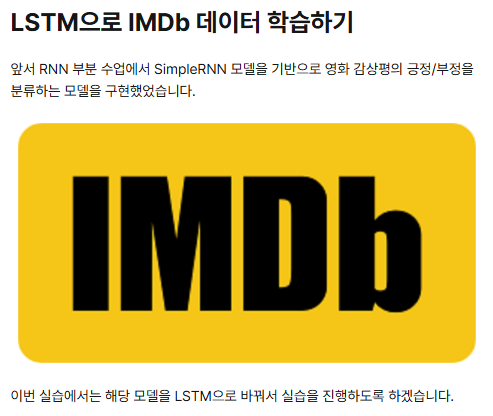

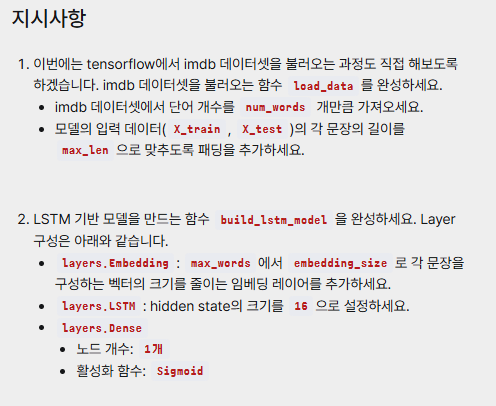

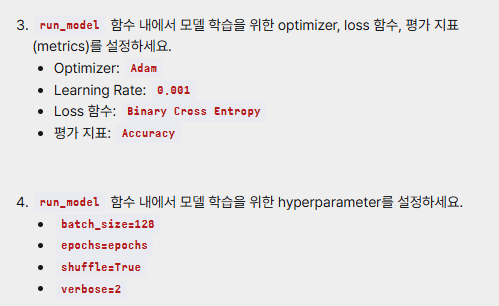

In [ ]:
from elice_utils import EliceUtils

elice_utils = EliceUtils()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(num_words, max_len):
    # TODO: [지시사항 1번] IMDB 데이터셋을 불러오세요.
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
    X_train = pad_sequences(X_train, maxlen=max_len) # 문장 단어개수 일괄적으로 맞추기 위해 패딩 추가
    X_test = pad_sequences(X_test, maxlen=max_len)

    return X_train, X_test, y_train, y_test

def build_lstm_model(num_words, embedding_len):
    model = Sequential()

    # TODO: [지시사항 2번] LSTM 기반 모델을 구성하세요.
    model.add(layers.Embedding(num_words, embedding_len)) #(전체단어중, 임베딩 길이만큼만)
    model.add(layers.LSTM(16))
    model.add(layers.Dense(1, activation="sigmoid")) # 값을 확률값으로

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=5):
    # TODO: [지시사항 3번] 모델 학습을 위한 optimizer, loss 함수, 평가 지표를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=128, shuffle=True, verbose=2)

    # 모델을 테스트 데이터셋으로 테스트합니다.
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print()
    print("테스트 loss: {:.5f}, 테스트 정확도: {:.3f}%".format(test_loss, test_acc * 100))

    return optimizer, hist

def main():
    tf.random.set_seed(2022)

    num_words = 6000
    max_len =  130
    embedding_len = 100

    X_train, X_test, y_train, y_test = load_data(num_words, max_len)

    model = build_lstm_model(num_words, embedding_len)
    run_model(model, X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()


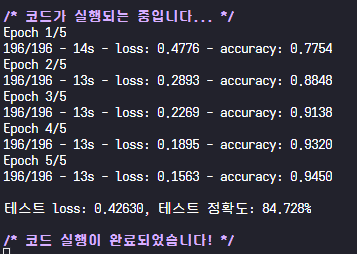